In [1]:
# importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [4]:



# Função odeint para OD/DBO analítica 
# dLdt = -kd*L ; dODdt = -kd*L + kd*(Os - OD)

def funcao (z, t):
    # Constantes da reação

    Os = 9.0
    kd = 0.5

    L, OD = z # Definir as 'variaveis variaveis'

    # Definir as funções
    dLdt = -kd*L
    dODdt = -kd*L + kd*(Os - OD)

    return dLdt, dODdt

# Condições iniciais

L0 = 100.0
OD0 = 8.0
z0 = L0, OD0


# Passo no tempo

t = np.linspace(0,100,300)


In [5]:
# Integrar as equações com odeint

funcao_resolvida = odeint(funcao, z0, t)
L, OD = funcao_resolvida.T

C:\Users\User\AppData\Local\Temp/ipykernel_13304/3729678290.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


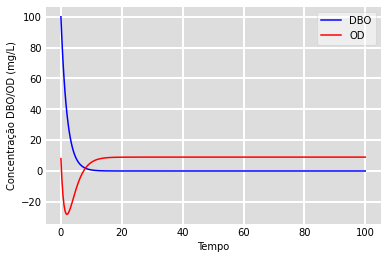

In [6]:
# Plotar o resultado

fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot (t, L, 'b', label = 'DBO')
ax.plot (t, OD, 'r', label = 'OD')
ax.set_xlabel ('Tempo')
ax.set_ylabel ('Concentração DBO/OD (mg/L)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


In [20]:
# Utilizando as equações OD/DBO + cargas (w)

# Função DBO/OD 
# dLdt = -kd * L + w1/V ; dODdt = -kd*L + ka*(Os-OD) + w2/V

def funcao2 (z, t):

    # Constantes da reação

    Os = 9.0
    kd = 0.5
    ka = 0.3
    w1 = 20
    w2 = 5
    V = 100 

    L, OD = z

    dLdt = -kd*L +w1/V
    dODdt = -kd*L + ka*(Os - OD) + w2/V

    return dLdt, dODdt

# Condições iniciais

L0 = 100.0
OD0 = 8.0
z_in = L0, OD0


# Passo no tempo

dt = np.linspace(0,100,300)

In [21]:
funcao_carga = odeint(funcao2, z_in, dt)
L1, OD1 = funcao_carga.T

C:\Users\User\AppData\Local\Temp/ipykernel_13304/604760211.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


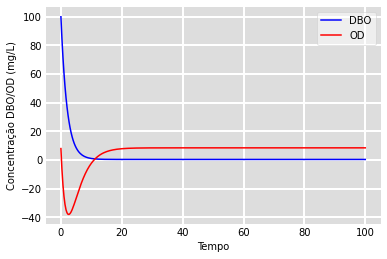

In [22]:
# Plotar o resultado

fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot (dt, L1, 'b', label = 'DBO')
ax.plot (dt, OD1, 'r', label = 'OD')
ax.set_xlabel ('Tempo')
ax.set_ylabel ('Concentração DBO/OD (mg/L)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [28]:
# Utilizando as equações OD/DBO + cargas (w) + balanço hidrico simplificado

# Função DBO/OD 

# VdLdt + L*bal_hid = -kd * L * V + w1 - Q_saida*L ; 
# dLdt = -L * ((bal_hid + Q_saida + kd*V)/V) + w1/V 
# dLdt = -L * m1 + carga1

# VdODdt + OD*bal_hid = -kd*L*V + ka*(Os-OD) * V + w2 - Q_saida*OD;
# dODdt = -OD * ((bal_hid + Q_saida - ka * V)/V) + w2/V - kd*L + ka*Os
# dODdt = -OD * m2 + carga2

# bal_hid = Q_1 + Q_2 - Q_saida

def funcao3 (z, t):

    L, OD = z
    
    # Constantes da reação

    Os = 9.0
    kd = 0.15
    ka = 0.3
    w1 = 20.0
    w2 = 5.0
    V = 100

    Q_1 = 0.5
    Q_2 = 0.5
    Q_saida = 0.2 
    bal_hid = Q_1 + Q_2 - Q_saida

    m1 = ((bal_hid + kd*V + Q_saida)/V)
    m2 = ((bal_hid - ka * V + Q_saida)/V)
    carga1 = w1/V
    carga2 = w2/V - kd*L + ka*Os
  

    dLdt = -kd*L +w1/V
    dODdt = -kd*L + ka*(Os - OD) + w2/V

    return dLdt, dODdt

# Condições iniciais

L0_2 = 100.0
OD0_2 = 8.0
z_in_2 = L0, OD0


# Passo no tempo

dt = np.linspace(0,100,300)

In [29]:
funcao_carga_bal_hid = odeint(funcao3, z_in_2, dt)
L2, OD2 = funcao_carga_bal_hid.T

C:\Users\User\AppData\Local\Temp/ipykernel_13304/1800598917.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


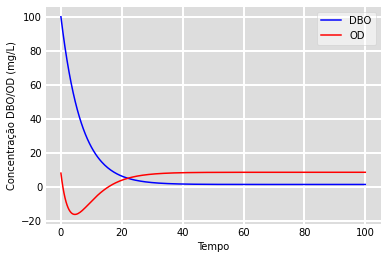

In [30]:
# Plotar o resultado

fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot (dt, L2, 'b', label = 'DBO')
ax.plot (dt, OD2, 'r', label = 'OD')
ax.set_xlabel ('Tempo')
ax.set_ylabel ('Concentração DBO/OD (mg/L)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [31]:
# Utilizando as equações OD/DBO completas + cargas (w) + balanço hidrico simplificado

# Função DBO/OD 

# VdLdt + L*bal_hid = + w1 - Q_saida*L - kd*L*V - k_sed*(1-L_part)*V*L + r_ca*r_oc*k_ra*alpha*V; 

# dLdt = -L * ((bal_hid + Q_saida + kd*V + K_sed*(1-L_part)*V) /V) + w1/V + r_ca*r_oc*k_ra*alpha;

# dLdt = -L * m1 + carga1

# VdODdt + OD*bal_hid = -kd*L*V + ka*(Os-OD)*V - r_on*k_n*L_n*V + pa*V - r_ca*r_oc*k_ra*alpha*V - (SOD/H)*V + w2 - Q_saida*OD;

# dODdt = -OD * ((bal_hid + Q_saida - ka*V)/V) + w2/V - kd*L + ka*Os - r_on*k_n*L_n + pa - r_ca*r_oc*k_ra*alpha - SOD/H

# dODdt = -OD * m2 + carga2

# bal_hid = Q_1 + Q_2 - Q_saida

In [ ]:
def funcao4 (z, t):

    L, OD = z
    
    # Constantes da reação

    Os = 9.0 #mgO2/L
    L_part = 0.5 #adimensional
    alpha = 12.8 #ug/L
    SOD = 1 #gO2/m^2 d
    H = 5.6 #m
    v_s = 1 #m/d
    Na = 0.157 #mgN/L
        
    kd = 0.2 #d^-1
    ka = 1.38 #d^-1    
    k_sed = v_s/H #d^-1
    kg = 2 #d^-1
    r_ca = 50 #gC/gChla
    r_oc = 2.67 #gO/gC
    r_on = 4.2 #gO/gN 
    k_ra = 0.05 #d^-1
    k_n = 0.1 #d^-1
    pa = r_oc*r_ca*k_g*alpha #mg/L

    w1 = 20.0 # 
    w2 = 5.0
    V = 100

    Q_1 = 0.5
    Q_2 = 0.5
    Q_saida = 0.2 
    bal_hid = Q_1 + Q_2 - Q_saida

    m1 = ((bal_hid + Q_saida + kd*V + K_sed*(1-L_part)*V) /V)
    m2 = ((bal_hid - ka * V + Q_saida)/V)
    carga1 = w1/V + r_ca*r_oc*k_ra*alpha
    carga2 = w2/V - kd*L + ka*Os - r_on*k_n*Na + pa - r_ca*r_oc*k_ra*alpha - SOD/H
  

    dLdt = -kd*L +w1/V
    dODdt = -kd*L + ka*(Os - OD) + w2/V

    return dLdt, dODdt

# Condições iniciais

L0_2 = 1.5 # mgO2/L
OD0_2 = 5.8 #mgO2/L
z_in_2 = L0, OD0


# Passo no tempo

dt = np.linspace(0,100,300)